In [51]:
# Install required libraries
!pip install gymnasium matplotlib numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: ipykernel 6.0.1 has a non-standard dependency specifier matplotlib-inline<0.2.0appnope,>=0.1.0; platform_system == "Darwin". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ipykernel or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [52]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

In [53]:
grid = np.zeros((3,3)) #this is how you define a 3x3 grid
print(grid)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


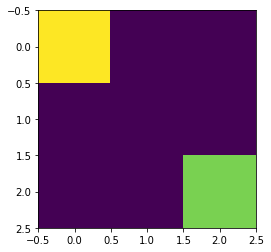

In [54]:
pos1 = [0,0] #start position of our agent
pos2 = [2,2] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8

plt.imshow(grid)

In [55]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):

      self.observation_space = spaces.Discrete(9)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 5

      self.timestep = 0
      self.agent_pos = [0, 0]
      self.goal_pos = [2, 2]
      self.state = np.zeros((3,3))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5

    # Reset function
    def reset(self, **kwargs):

      self.state = np.zeros((3,3))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      observation = self.state.flatten()

      info = {}

      return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):

      if action == 0: #down
        self.agent_pos[0] += 1
      if action == 1: #up
        self.agent_pos[0] -= 1
      if action == 2: #right
        self.agent_pos[1] += 1
      if action == 3: #left
        self.agent_pos[1] -= 1

      # Comment this to demonstrate the truncation condition.
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      self.state = np.zeros((3,3))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      observation = self.state.flatten()

      reward = 0
      if np.array_equal(self.agent_pos, self.goal_pos):
        reward = 1

      self.timestep += 1

      # Condition to check for termination (episode is over)
      terminated = True if self.timestep >= self.max_timesteps else False

      # Condition to check if agent is traversing to a cell beyond the permitted cells
      # This helps the agent to learn how to behave in a safe and predictable manner
      truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

      info = {}

      return observation, reward, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
      plt.title('Grid Environment')
      plt.imshow(self.state)

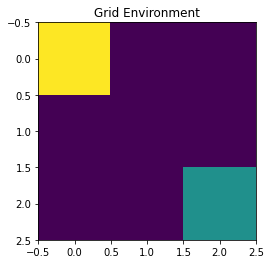

In [56]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()


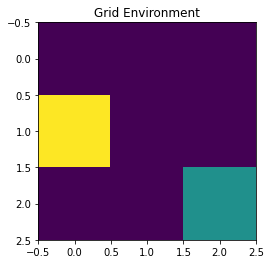

In [57]:
action = 0
observation, reward, done, truncated, info = env.step(action)
env.render()

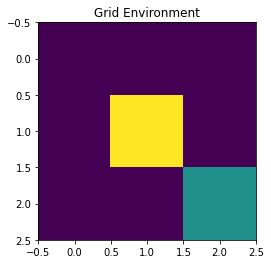

In [58]:
action = 2
observation, reward, done, truncated, info = env.step(action)
env.render()

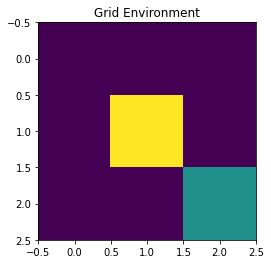

In [59]:
action = 4
observation, reward, done, truncated, info = env.step(action)
env.render()

In [60]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

Action: 0 , Reward: 0 , Done: False
Action: 3 , Reward: 0 , Done: False
Action: 1 , Reward: 0 , Done: False
Action: 2 , Reward: 0 , Done: False
Action: 1 , Reward: 0 , Done: True


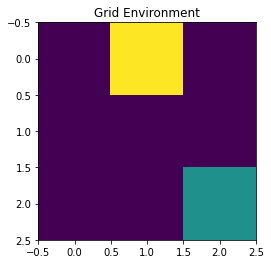

In [61]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  while not terminated:
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()

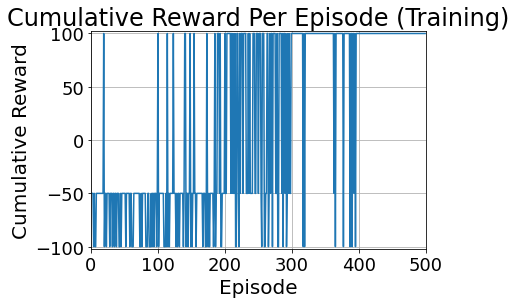

In [62]:
# Generating reward values for sample graph
initial_rewards = np.random.choice([-50, -100, 100], 100, p=[0.7, 0.29, 0.01])
intermediate_rewards = np.random.choice([-50, -100, 100], 100, p=[0.6, 0.25, 0.15])
final_rewards_1 = np.random.choice([-50, -100, 100], 100, p=[0.3, 0.1, 0.6])
final_rewards_2 = np.random.choice([-50, -100, 100], 100, p=[0.05, 0.05, 0.9])
final_rewards_3 = np.random.choice([-50, -100, 100], 100, p=[0.00, 0.00, 1])

reward_per_episode = np.concatenate((initial_rewards, intermediate_rewards,
                                    final_rewards_1, final_rewards_2, final_rewards_3))

# Reward Dynamics: Sample example
plt.figure()
plt.plot(reward_per_episode)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([-100, -50, 0, 50, 100], fontsize=18)
plt.ylim(ymin=-102, ymax=102)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

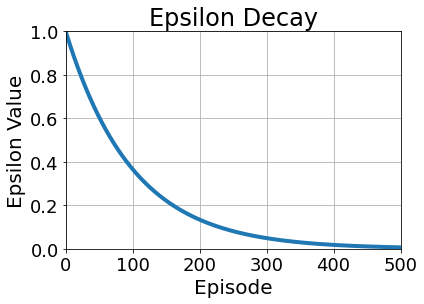

In [63]:
# Generating epsilon values for a sample graph
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()